In [1]:
from brainprint.dl.load import INFO
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import pandas as pd

In [2]:
INFO["Spatial Resolution"] = INFO["Spatial Resolution"].apply(lambda x: ast.literal_eval(x))
INFO[["X", "Y", "Z"]] = INFO["Spatial Resolution"].apply(pd.Series).round(3)
INFO["Z"] = INFO["Z"].map('{:,.3f}'.format)

In [4]:
INFO

,Subject ID,Sex,Date of Birth,Scan Date,Scan Description,TR,TE,TI,Spatial Resolution,Flip Angle,Age,X,Y,Z
99591,3423,M,2004-10-01,2022-11-06,T1w_MPRAGE_RL,2400,2.78,1000,"[0.8984375, 0.8984375, 0.89999997615814]",8,18.093750,0.898,0.898,0.900
99592,3423,M,2004-10-01,2022-11-06,T1w_MPRAGE_RL,2400,2.78,1000,"[0.8984375, 0.8984375, 0.89999997615814]",8,18.093750,0.898,0.898,0.900
99573,3422,F,1992-12-05,2022-11-06,T1w_MPRAGE_RL,2400,2.78,1000,"[0.8984375, 0.8984375, 0.89999997615814]",8,29.921875,0.898,0.898,0.900
99572,3422,F,1992-12-05,2022-11-06,T1w_MPRAGE_RL,2400,2.78,1000,"[0.8984375, 0.8984375, 0.89999997615814]",8,29.921875,0.898,0.898,0.900
99552,3421,M,1973-03-07,2022-11-06,T1w_MPRAGE_RL,2400,2.78,1000,"[0.8984375, 0.8984375, 0.89999997615814]",8,49.656250,0.898,0.898,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30205,444,F,1989-04-24,2014-11-13,MPRAGE_iso1mm,1750,2.61,900,"[1.0, 1.0, 1.0]",8,25.562500,1.000,1.000,1.000
30340,443,M,1984-05-07,2014-11-09,MPRAGE_iso1mm,1750,2.61,900,"[1.0, 1.0, 1.0]",8,30.515625,1.000,1.000,1.000
30322,443,M,1984-05-07,2014-11-05,MPRAGE_iso1mm,1750,2.61,900,"[1.0, 1.0, 1.0]",8,30.500000,1.000,1.000,1.000
30311,453,F,1975-12-22,2014-11-03,MPRAGE_iso1mm,1750,2.61,900,"[1.0, 1.0, 1.0]",8,38.875000,1.000,1.000,1.000


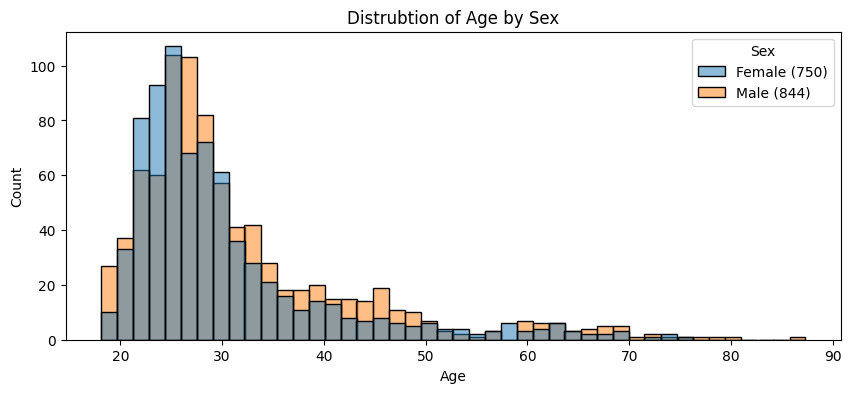

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
single_scans = INFO.groupby("Subject ID").first().copy()
sex_counts = single_scans["Sex"].value_counts()
single_scans.loc[single_scans["Sex"] == "M", "Sex"] = f"Male ({sex_counts['M']})"
single_scans.loc[single_scans["Sex"] == "F", "Sex"] = f"Female ({sex_counts['F']})"
sns.histplot(
    single_scans, 
    x="Age", 
    hue="Sex",    
    ax=ax,
)
_ = ax.set_title("Distrubtion of Age by Sex")

In [5]:
counts = INFO[["Scan Description", "TE", "TR", "TI", "Flip Angle", "X", "Y", "Z"]].value_counts().sort_index(level=0)
counts.name = "Count"

In [7]:
counts.to_frame().to_csv("protocol counts.csv")

In [6]:
import dataframe_image as dfi

dfi.export(counts.to_frame(), "protocol counts.png")

[1231/160433.101349:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1231/160433.117859:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[1231/160433.435441:INFO:headless_shell.cc(623)] Written to file /tmp/tmpgaot4vvg/temp.png.


In [15]:
q = pd.read_csv("data/questionnaire.csv")

In [19]:
personality_traits = q.iloc[:, -7:-2]
personality_traits

,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness to Experience
0,3.222222,2.777778,2.500,2.875,3.9
1,3.222222,2.888889,3.875,3.750,4.6
2,4.666667,2.888889,3.625,3.125,4.1
3,3.666667,4.555556,2.500,2.250,4.6
4,3.555556,4.444444,3.750,2.125,4.1
...,...,...,...,...,...
410,3.777778,3.555556,2.500,1.875,4.0
411,3.444444,3.222222,2.375,3.625,3.8
412,4.555556,4.222222,2.500,1.750,4.0
413,3.555556,2.777778,2.000,4.625,4.8


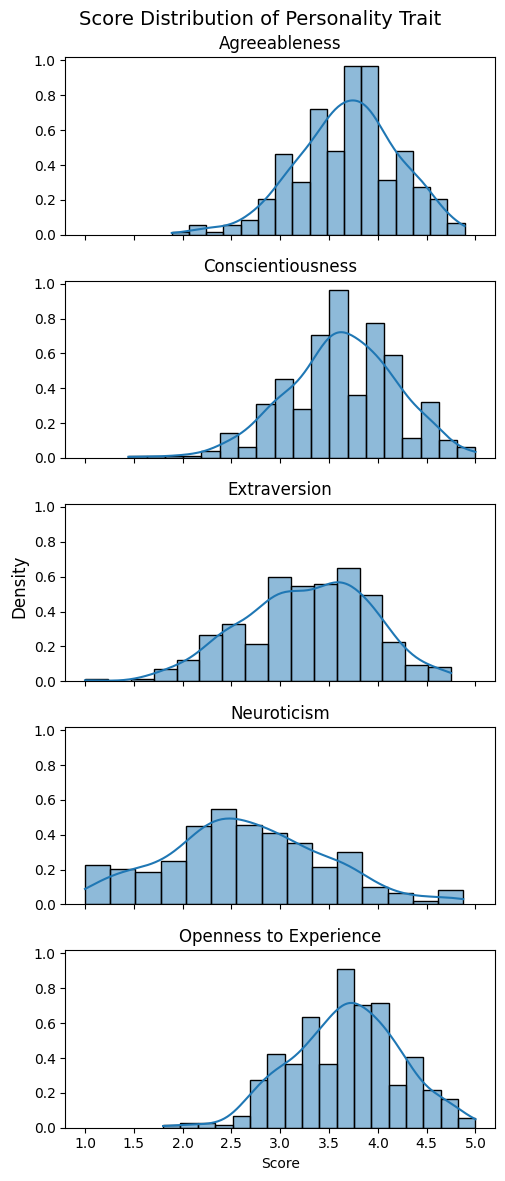

In [91]:
fig, axes = plt.subplots(
    nrows=len(personality_traits.columns), 
    figsize=(5, 12),
    sharex=True,
    sharey=True
)

for i, ax in enumerate(axes):    
    trait = personality_traits.columns[i]
    sns.histplot(
        data=personality_traits, 
        x=trait,
        stat="density",
        kde=True,
        ax=ax,        
    )
    ax.set(ylabel=None)
    if i == len(axes) - 1:
        ax.set(xlabel="Score")
    ax.set_title(trait, fontsize=12)
fig.suptitle("Score Distribution of Personality Trait", fontsize=14)
fig.text(0, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)
fig.tight_layout()